<a href="https://colab.research.google.com/github/vekoada/tensorflow-course/blob/main/03_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Follow this link to see how to preprocess the Food 101 dataset (already preprocessed in this notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [ ]:
import urllib.request
import zipfile
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
filename = 'pizza_steak.zip'
file = urllib.request.urlretrieve(url, filename)
zip_ref = zipfile.ZipFile(filename)
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
#Walk through directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} image(s) in "{dirpath}".')

There are 2 directories and 0 image(s) in "pizza_steak".
There are 2 directories and 0 image(s) in "pizza_steak/train".
There are 0 directories and 750 image(s) in "pizza_steak/train/pizza".
There are 0 directories and 750 image(s) in "pizza_steak/train/steak".
There are 2 directories and 0 image(s) in "pizza_steak/test".
There are 0 directories and 250 image(s) in "pizza_steak/test/pizza".
There are 0 directories and 250 image(s) in "pizza_steak/test/steak".


In [ ]:
#Another way to check
len(os.listdir('pizza_steak/train/steak'))

750

In [ ]:
# Getting classnames
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) #List of class names from subdirs
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_randimg(target_dir, target_class):
  target_folder = target_dir + '/' + target_class
  randimg = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + randimg[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')

Image shape: (512, 512, 3)


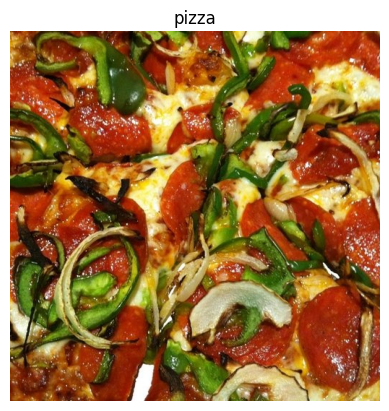

In [ ]:
img = view_randimg(target_dir='pizza_steak/train', target_class='pizza')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Make all pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), #Reshaping all imgs to this shape
                                               class_mode='binary')
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Constructing the model (same as Tiny VGG on the CNN explainer website)
#We haven't learned this, instructor just wanted to get going ASAP
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 20s 139ms/step - loss: 0.5509 - accuracy: 0.7087 - val_loss: 0.4204 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4460 - accuracy: 0.8073 - val_loss: 0.3572 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.3960 - accuracy: 0.8220 - val_loss: 0.3590 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.3839 - accuracy: 0.8300 - val_loss: 0.3109 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3360 - accuracy: 0.8547 - val_loss: 0.3104 - val_accuracy: 0.8680


In [ ]:
#Note: on the above model we used a GPU because it's way faster

In [ ]:
# Trying a previous (non-convolved) model on our image dataset
model_2= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 108ms/step - loss: 0.8400 - accuracy: 0.5800 - val_loss: 0.5967 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 5s 109ms/step - loss: 0.7007 - accuracy: 0.5120 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 138ms/step - loss: 0.7402 - accuracy: 0.5833 - val_loss: 0.5133 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6798 - accuracy: 0.7233 - val_loss: 0.7693 - val_accuracy: 0.6620
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.9247 - accuracy: 0.6880 - val_loss: 0.5470 - val_accuracy: 0.7840


Text(0, 0.5, 'Loss')

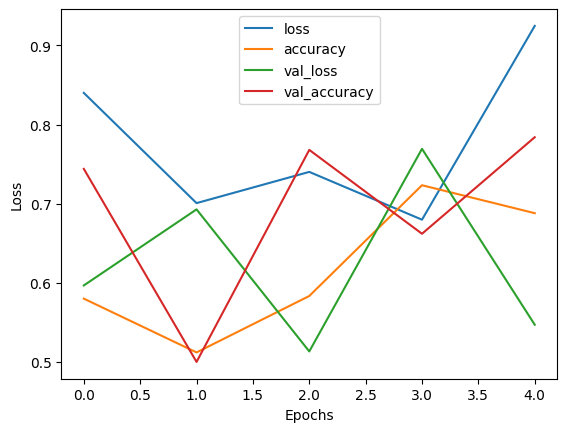

In [ ]:
import pandas as pd
pd.DataFrame(history_2.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
#Clearly not doing to well...let's try again but with more layers

In [ ]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4, restore_best_weights=True)

history_3 = model_3.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/50
47/47 [==============================] - 8s 118ms/step - loss: 2.0724 - accuracy: 0.6173 - val_loss: 0.5678 - val_accuracy: 0.7340
Epoch 2/50
47/47 [==============================] - 5s 104ms/step - loss: 0.7047 - accuracy: 0.7320 - val_loss: 0.5768 - val_accuracy: 0.7420
Epoch 3/50
47/47 [==============================] - 6s 123ms/step - loss: 0.7359 - accuracy: 0.7313 - val_loss: 0.4706 - val_accuracy: 0.7760
Epoch 4/50
47/47 [==============================] - 5s 107ms/step - loss: 0.5229 - accuracy: 0.7660 - val_loss: 0.6009 - val_accuracy: 0.6660
Epoch 5/50
47/47 [==============================] - 6s 124ms/step - loss: 0.5725 - accuracy: 0.7547 - val_loss: 0.6622 - val_accuracy: 0.6960
Epoch 6/50
47/47 [==============================] - 5s 106ms/step - loss: 0.4115 - accuracy: 0.8187 - val_loss: 0.5712 - val_accuracy: 0.7060
Epoch 7/50
47/47 [==============================] - 5s 113ms/step - loss: 0.4362 - accuracy: 0.8073 - val_loss: 0.4754 - val_accuracy: 0.7720
Epoch 

<Axes: >

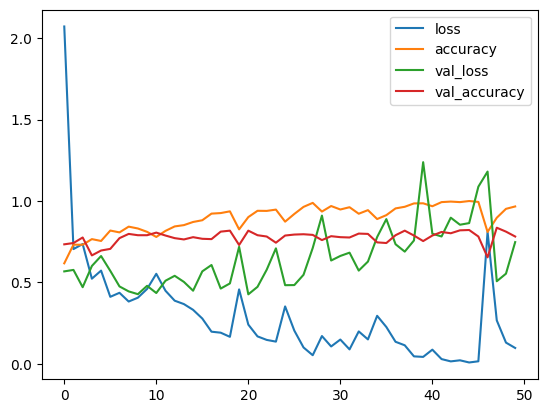

In [ ]:
pd.DataFrame(history_3.history).plot()

In [ ]:
model_3.evaluate(valid_data)

16/16 [==============================] - 2s 114ms/step - loss: 0.7477 - accuracy: 0.7820


[0.7476668357849121, 0.7820000052452087]

### Breaking down our model

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


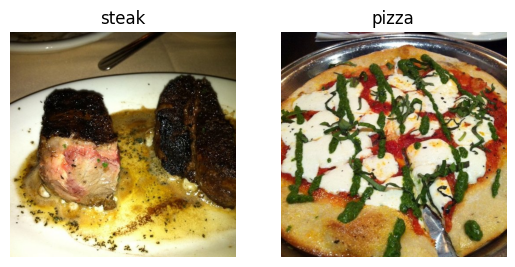

In [ ]:
#Visualize random images to get better idea of data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_randimg('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
steak_img = view_randimg('pizza_steak/train/', 'pizza')

In [ ]:
#Preprocessing (we've already done this - just reiterating for understanding)
#Defining directory paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.15, zoom_range=0.15, rotation_range=30, horizontal_flip=True, vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.15, zoom_range=0.15, rotation_range=30, horizontal_flip=True, vertical_flip=True)
#Gaffe - I should not have augmented the testing data - this is usually only performed on training data

In [ ]:
#Load in our image data from dirs and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get sample of training data
images, labels = train_data.next() #gets next batch of images/labels from training data
print(len(images), len(labels))
print(len(train_data)*32)

32 32
1504


In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
#Creating our baseline model (simple model that subsequent optimizations aim to beat)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Sequential

model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_8 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_11 (Flatten)        (None, 475240)            0         
                                                                 
 dense_31 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 29s 573ms/step - loss: 0.7061 - accuracy: 0.5633 - val_loss: 0.6936 - val_accuracy: 0.5600
Epoch 2/10
47/47 [==============================] - 32s 683ms/step - loss: 0.6523 - accuracy: 0.6380 - val_loss: 0.5586 - val_accuracy: 0.7060
Epoch 3/10
47/47 [==============================] - 31s 653ms/step - loss: 0.5509 - accuracy: 0.7260 - val_loss: 0.5645 - val_accuracy: 0.7020
Epoch 4/10
47/47 [==============================] - 27s 568ms/step - loss: 0.4884 - accuracy: 0.7787 - val_loss: 0.3646 - val_accuracy: 0.8560
Epoch 5/10
47/47 [==============================] - 46s 985ms/step - loss: 0.4312 - accuracy: 0.8127 - val_loss: 0.3656 - val_accuracy: 0.8620
Epoch 6/10
47/47 [==============================] - 31s 670ms/step - loss: 0.4869 - accuracy: 0.7773 - val_loss: 0.4174 - val_accuracy: 0.8100
Epoch 7/10
47/47 [==============================] - 27s 569ms/step - loss: 0.4208 - accuracy: 0.8173 - val_loss: 0.3484 - val_accuracy: 0.8520

<Axes: >

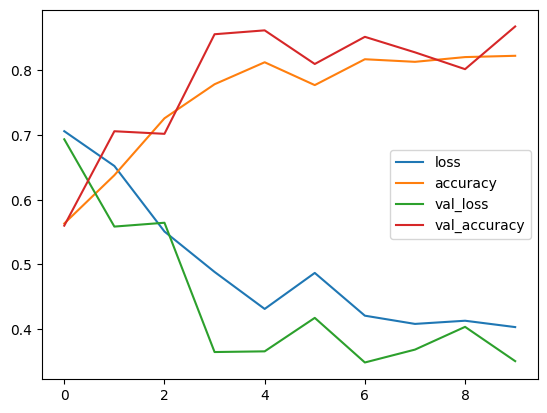

In [ ]:
pd.DataFrame(history_4.history).plot() #a bit confusing

In [ ]:
def plot_loss(history):
  """
  Returns separated loss curves for metrics
  """
  loss=history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #Loss plot
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  #Accuracy Plot
  plt.plot(epochs, accuracy, label='accuracy')
  plt.plot(epochs, val_acc, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

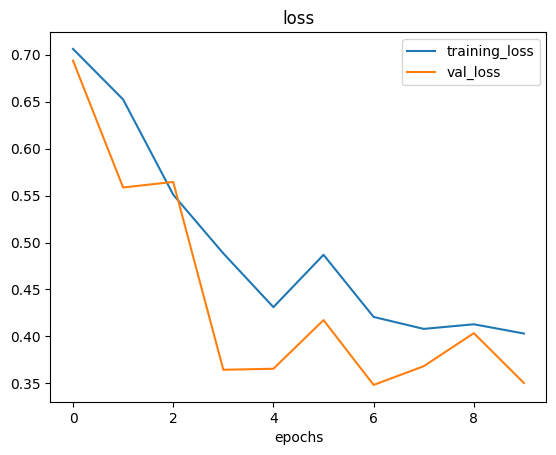

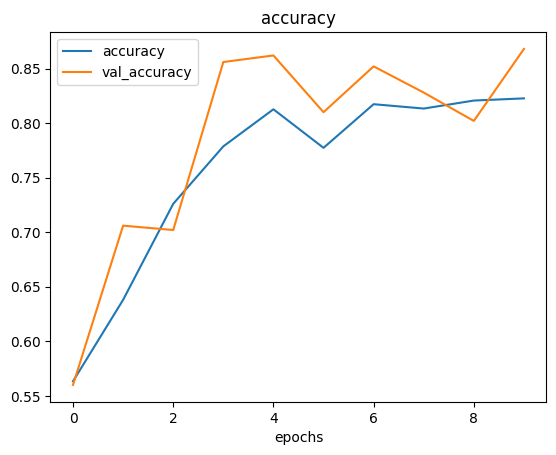

In [ ]:
plot_loss(history_4)

In [ ]:
model_4.save('baseline_CNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
baseline = tf.keras.models.load_model('baseline_CNN.h5')

In [ ]:
baseline.evaluate(test_data)

16/16 [==============================] - 13s 319ms/step - loss: 0.3353 - accuracy: 0.8720


[0.3352668285369873, 0.871999979019165]

In [ ]:
#Creating new model with maxpooling to benchmark vs baseline
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Sequential

In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 32s 591ms/step - loss: 0.6536 - accuracy: 0.6180 - val_loss: 0.5620 - val_accuracy: 0.7320
Epoch 2/10
47/47 [==============================] - 30s 646ms/step - loss: 0.5679 - accuracy: 0.7213 - val_loss: 0.4985 - val_accuracy: 0.7680
Epoch 3/10
47/47 [==============================] - 25s 536ms/step - loss: 0.5032 - accuracy: 0.7680 - val_loss: 0.4411 - val_accuracy: 0.8000
Epoch 4/10
47/47 [==============================] - 27s 568ms/step - loss: 0.4809 - accuracy: 0.7853 - val_loss: 0.4121 - val_accuracy: 0.8100
Epoch 5/10
47/47 [==============================] - 25s 518ms/step - loss: 0.4539 - accuracy: 0.7973 - val_loss: 0.3822 - val_accuracy: 0.8280
Epoch 6/10
47/47 [==============================] - 27s 567ms/step - loss: 0.4417 - accuracy: 0.8033 - val_loss: 0.3925 - val_accuracy: 0.8240
Epoch 7/10
47/47 [==============================] - 25s 534ms/step - loss: 0.4411 - accuracy: 0.8067 - val_loss: 0.3694 - val_accuracy: 0.8400

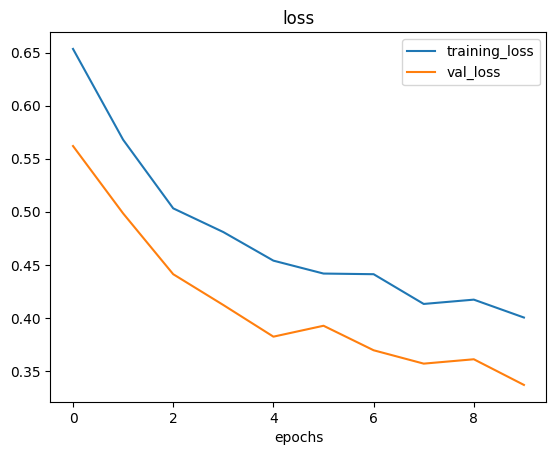

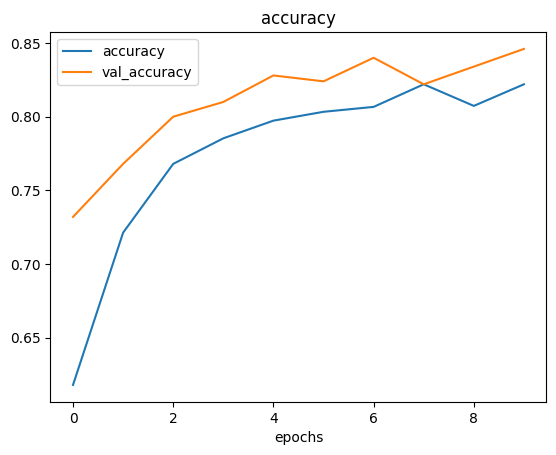

In [ ]:
plot_loss(history_5)

In [ ]:
model_5.evaluate(test_data) #Not really any improvement...

16/16 [==============================] - 6s 368ms/step - loss: 0.3420 - accuracy: 0.8440


[0.342044472694397, 0.843999981880188]

In [ ]:
#Making two different ImageDataGenerator training instances
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.) #We typically don't augment testing data

In [ ]:
#Importing data and augmenting from training directory
seed=42
print("Augmented Training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode='binary',
                                                                   batch_size=32,
                                                                   seed=seed)
print("Non-augmented Training Data")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32,
                                               seed=seed)
print("Non-augmented Testing Data")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented Testing Data
Found 500 images belonging to 2 classes.


In [ ]:
#Visualize some of the augmented data
images, labels = train_data.next()
aug_images, aug_labels = train_data_augmented.next()

Image number: 26


(-0.5, 223.5, 223.5, -0.5)

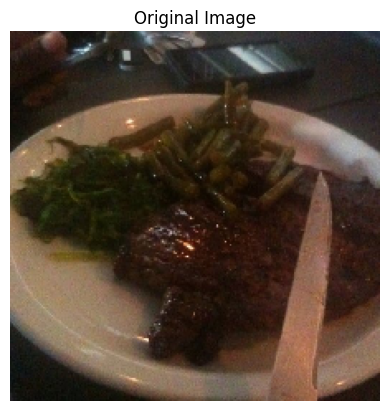

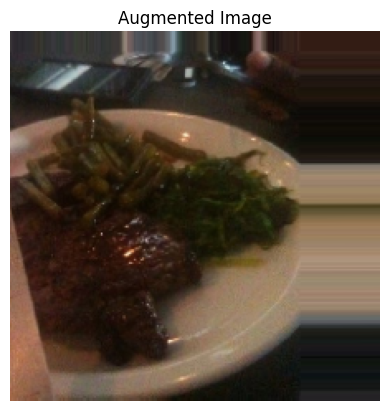

In [ ]:
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
print(f'Image number: {random_number}')
plt.title(f'Original Image')
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [ ]:
#Create a model on the augmented data (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_6=model_6.fit(train_data_augmented,
                      epochs=10,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 24s 470ms/step - loss: 0.6487 - accuracy: 0.6000 - val_loss: 0.4563 - val_accuracy: 0.8140
Epoch 2/10
47/47 [==============================] - 20s 430ms/step - loss: 0.5442 - accuracy: 0.7300 - val_loss: 0.4127 - val_accuracy: 0.8160
Epoch 3/10
47/47 [==============================] - 21s 450ms/step - loss: 0.5184 - accuracy: 0.7460 - val_loss: 0.4130 - val_accuracy: 0.8020
Epoch 4/10
47/47 [==============================] - 22s 459ms/step - loss: 0.4966 - accuracy: 0.7687 - val_loss: 0.3935 - val_accuracy: 0.8400
Epoch 5/10
47/47 [==============================] - 21s 447ms/step - loss: 0.4967 - accuracy: 0.7507 - val_loss: 0.3600 - val_accuracy: 0.8440
Epoch 6/10
47/47 [==============================] - 22s 460ms/step - loss: 0.4996 - accuracy: 0.7667 - val_loss: 0.3578 - val_accuracy: 0.8580
Epoch 7/10
47/47 [==============================] - 20s 428ms/step - loss: 0.4672 - accuracy: 0.7847 - val_loss: 0.3398 - val_accuracy: 0.8640

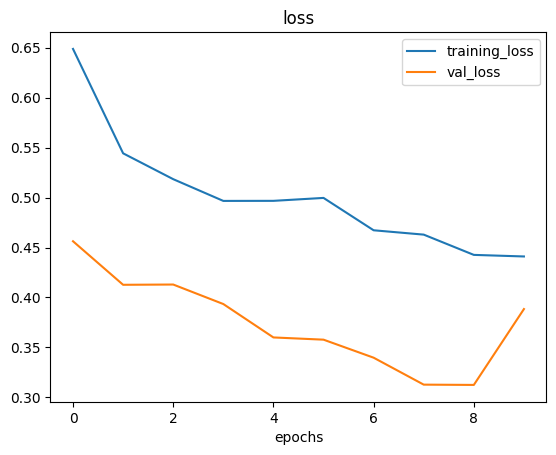

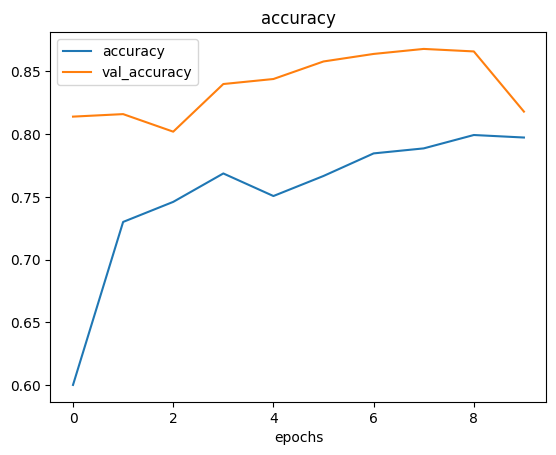

In [ ]:
plot_loss(history_6)

In [ ]:
model_6.evaluate(test_data)

16/16 [==============================] - 2s 100ms/step - loss: 0.3884 - accuracy: 0.8180


[0.3884366452693939, 0.8180000185966492]

In [ ]:
model_7 = tf.keras.models.Sequential([
    Conv2D(filters=64,
           kernel_size=3,
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=(2, 2),
              strides=1,
              padding='valid'),
    Conv2D(16, 3, activation='relu'),
    Conv2D(8, 3, activation='relu'),
    MaxPool2D(pool_size=(3, 3),
              strides=1,
              padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 patience=2,
                                                 factor=0.1,
                                                 min_lr=1e-5,
                                                 cooldown=0)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=4,
                                              restore_best_weights=True)

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented,
                        epochs=20,
                        callbacks=[reduce_lr, early_stop],
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/20
47/47 [==============================] - 34s 575ms/step - loss: 0.9375 - accuracy: 0.4713 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
47/47 [==============================] - 25s 528ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/20
47/47 [==============================] - 22s 467ms/step - loss: 0.6932 - accuracy: 0.4740 - val_loss: 0.6931 - val_accuracy: 0.5040 - lr: 0.0010
Epoch 4/20
47/47 [==============================] - 25s 515ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5040 - lr: 1.0000e-04
Epoch 5/20
47/47 [==============================] - 22s 468ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5060 - lr: 1.0000e-04
Epoch 6/20
47/47 [==============================] - 25s 515ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5060 - lr: 1.0000e-05
Epoch 7/20
47/47 [==============================] - 

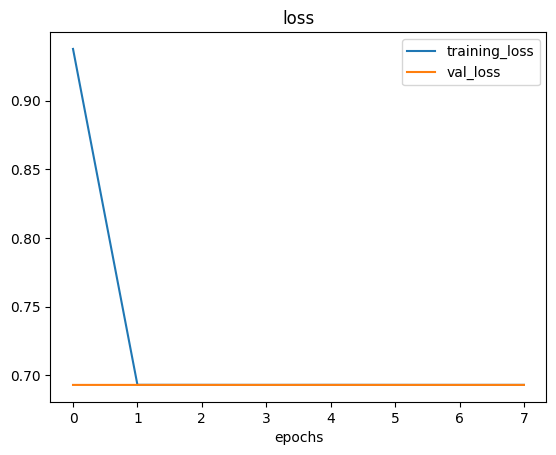

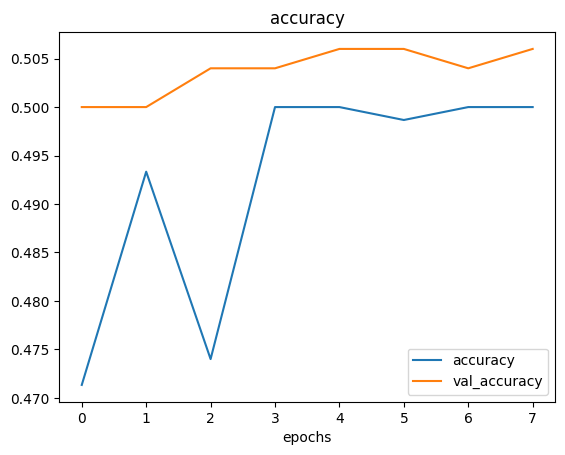

In [ ]:
plot_loss(history_7) #very bad..maybe we'll revisit this

--2023-09-10 03:38:17--  https://hips.hearstapps.com/del.h-cdn.co/assets/18/08/2048x1152/hd-aspect-1519155106-flank-steak-horizontal.jpg?resize=1200:*
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118284 (116K) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>] 115.51K  --.-KB/s    in 0.003s  

2023-09-10 03:38:17 (38.9 MB/s) - ‘03-steak.jpeg’ saved [118284/118284]



(-0.5, 1199.5, 674.5, -0.5)

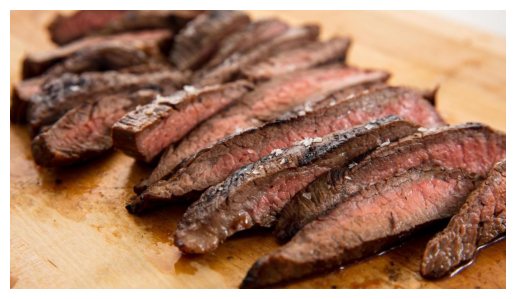

In [ ]:
#Making predictions on a custom image
import matplotlib.image as mpimg
!wget -O 03-steak.jpeg https://hips.hearstapps.com/del.h-cdn.co/assets/18/08/2048x1152/hd-aspect-1519155106-flank-steak-horizontal.jpg?resize=1200:*
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape #We can't pass this straight into our model - we need to preprocess

(675, 1200, 3)

In [ ]:
import tensorflow as tf

In [ ]:
#Create helper function to do just that
def prep_image(filename, image_shape=224):
  """
  Reads an image from filename, turns into tensor and reshapes
  to (image_shape, image_shape, color_channels)
  """
  #Read in the image
  img = tf.io.read_file(filename)
  #Decode into tensor
  img = tf.image.decode_image(img)
  #Resize image
  img = tf.image.resize(img, size=[image_shape, image_shape])
  #Rescale normalize
  img = img/255.
  return img

In [ ]:
#Load and preprocess our custom image
steak = prep_image('03-steak.jpeg')
steak.shape, steak

(TensorShape([224, 224, 3]),
 <tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.9058608 , 0.72154707, 0.54899806],
         [0.9095257 , 0.7173688 , 0.54874134],
         [0.9098302 , 0.70983016, 0.5412027 ],
         ...,
         [0.91722673, 0.91330516, 0.8976189 ],
         [0.9137255 , 0.9098039 , 0.89411765],
         [0.9105043 , 0.9065827 , 0.89089644]],
 
        [[0.8986607 , 0.7065038 , 0.53787637],
         [0.9102853 , 0.7139268 , 0.54529935],
         [0.91756827, 0.70972514, 0.5450192 ],
         ...,
         [0.91722673, 0.91330516, 0.8976189 ],
         [0.9137255 , 0.9098039 , 0.89411765],
         [0.9105043 , 0.9065827 , 0.89089644]],
 
        [[0.89063376, 0.7023984 , 0.5220063 ],
         [0.90393037, 0.7037897 , 0.5273894 ],
         [0.90601367, 0.69803923, 0.5254902 ],
         ...,
         [0.9172408 , 0.91331923, 0.89763296],
         [0.9137865 , 0.9098649 , 0.8941786 ],
         [0.9106121 , 0.90669054, 0.89100426]],
 
        ...,
 
   

In [ ]:
pred = baseline.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 30ms/step


In [ ]:
#Let's create another function that displays the image and decodes the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def plot_predict(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes prediction with model,
  plots image with predicted class as title
  """
  #Import the target image and preprocess
  img = prep_image(filename)
  #Prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  #Plot
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}, {tf.round(pred[0][0]*100)}%")
  plt.axis(False)

1/1 [==============================] - 0s 21ms/step


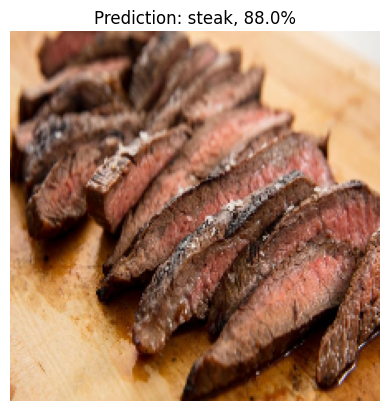

In [ ]:
#Test the model
plot_predict(baseline, '03-steak.jpeg')

--2023-09-10 03:58:13--  https://thecozycook.com/wp-content/uploads/2021/07/Zucchini-Crust-Pizza-f.jpg
Resolving thecozycook.com (thecozycook.com)... 104.18.1.2, 104.18.0.2, 2606:4700::6812:102, ...
Connecting to thecozycook.com (thecozycook.com)|104.18.1.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118739 (116K) [image/jpeg]
Saving to: ‘03-pizza.jpeg’

03-pizza.jpeg       100%[===================>] 115.96K  --.-KB/s    in 0.002s  

2023-09-10 03:58:14 (55.6 MB/s) - ‘03-pizza.jpeg’ saved [118739/118739]



(-0.5, 699.5, 699.5, -0.5)

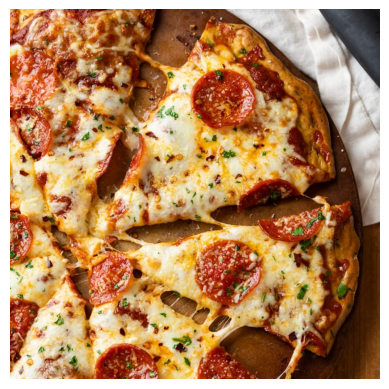

In [ ]:
#Now trying with a custom pizza image
!wget -O 03-pizza.jpeg https://thecozycook.com/wp-content/uploads/2021/07/Zucchini-Crust-Pizza-f.jpg
pizza = mpimg.imread('03-pizza.jpeg')
plt.imshow(pizza)
plt.axis(False)

1/1 [==============================] - 0s 21ms/step


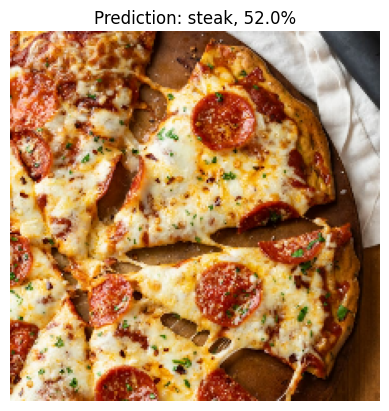

In [ ]:
#Now for the prediction
plot_predict(baseline, '03-pizza.jpeg') #oof

--2023-09-10 04:03:57--  https://cdn.loveandlemons.com/wp-content/uploads/2023/02/vegetarian-pizza.jpg
Resolving cdn.loveandlemons.com (cdn.loveandlemons.com)... 52.84.251.17, 52.84.251.24, 52.84.251.80, ...
Connecting to cdn.loveandlemons.com (cdn.loveandlemons.com)|52.84.251.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147569 (144K) [image/jpeg]
Saving to: ‘04-pizza.jpeg’

04-pizza.jpeg       100%[===================>] 144.11K  --.-KB/s    in 0.004s  

2023-09-10 04:03:57 (35.0 MB/s) - ‘04-pizza.jpeg’ saved [147569/147569]

1/1 [==============================] - 0s 27ms/step


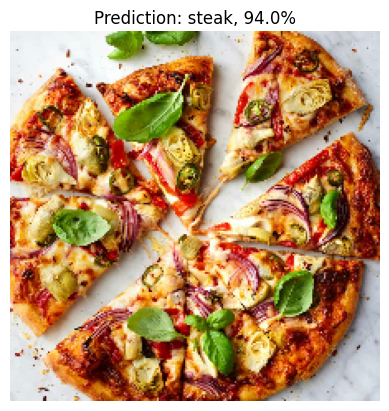

In [ ]:
!wget -O 04-pizza.jpeg https://cdn.loveandlemons.com/wp-content/uploads/2023/02/vegetarian-pizza.jpg
pizza2 = mpimg.imread('04-pizza.jpeg')
plot_predict(baseline, '04-pizza.jpeg') #hmm still not getting it

In [ ]:
baseline.evaluate(test_data) #Should be doing better

16/16 [==============================] - 3s 174ms/step - loss: 0.3693 - accuracy: 0.8460


[0.3693367838859558, 0.8460000157356262]

--2023-09-10 04:06:32--  https://thefoodcharlatan.com/wp-content/uploads/2021/08/Homemade-Pizza-Recipe-1-Hour-or-Overnight-20.jpg
Resolving thefoodcharlatan.com (thefoodcharlatan.com)... 104.18.1.2, 104.18.0.2, 2606:4700::6812:102, ...
Connecting to thefoodcharlatan.com (thefoodcharlatan.com)|104.18.1.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156060 (152K) [image/jpeg]
Saving to: ‘05-pizza.jpeg’

05-pizza.jpeg       100%[===================>] 152.40K  --.-KB/s    in 0.004s  

2023-09-10 04:06:32 (40.5 MB/s) - ‘05-pizza.jpeg’ saved [156060/156060]

1/1 [==============================] - 0s 37ms/step


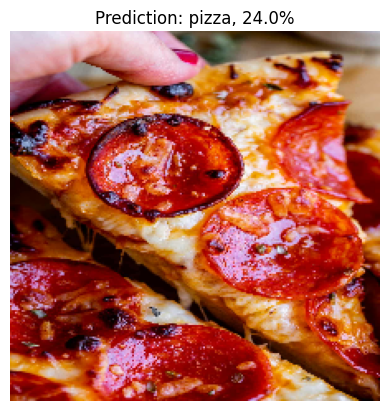

In [ ]:
!wget -O 05-pizza.jpeg https://thefoodcharlatan.com/wp-content/uploads/2021/08/Homemade-Pizza-Recipe-1-Hour-or-Overnight-20.jpg
plot_predict(baseline, '05-pizza.jpeg') #Better...% < 50% means that it's more likely pizza